In [40]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
# load index returns
file_path = r"C:\Users\Kuhu\Downloads\Nifty 50 Historical Data.csv"

data = pd.read_csv(file_path, header=None)

In [42]:
data.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change']

In [44]:
data = data[data['Date'] != 'Date']

In [45]:
#Parse dates
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [46]:
# Remove embedded header row
data = data[data['Date'] != 'Date']

# Parse Date safely
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Clean Price
data['Price'] = (
    data['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Sort and index
data = data.sort_values('Date').set_index('Date')

In [47]:
print(data.head())
print(data.index.dtype)

               Price       Open       High        Low      Vol  Change
Date                                                                  
2025-01-07  25541.80  25,551.35  25,593.40  25,501.80  260.67M   0.10%
2025-06-13  24718.60  24,473.00  24,754.35  24,473.00  318.71M  -0.68%
2025-06-16  24946.50  24,732.35  24,967.10  24,703.60  305.81M   0.92%
2025-06-17  24853.40  24,977.85  24,982.05  24,813.70  242.42M  -0.37%
2025-06-18  24812.05  24,788.35  24,947.55  24,750.45  237.60M  -0.17%
datetime64[ns]


In [50]:
import numpy as np
# 2. Compute returns
rets = 100 * data['Price'].pct_change()
rets = rets.replace([np.inf, -np.inf], np.nan).dropna()

# ARCH is safest with NumPy arrays
rets_np = rets.to_numpy()

# (recommended) scale back to decimals for stability
rets_np = rets_np 


In [51]:
from arch import arch_model
# Fit GARCH(1,1)
model = arch_model(
    rets_np,
    mean='Zero',
    vol='Garch',
    p=1,
    q=1,
    dist='t'
)

res = model.fit(disp='off')
cond_vol = res.conditional_volatility


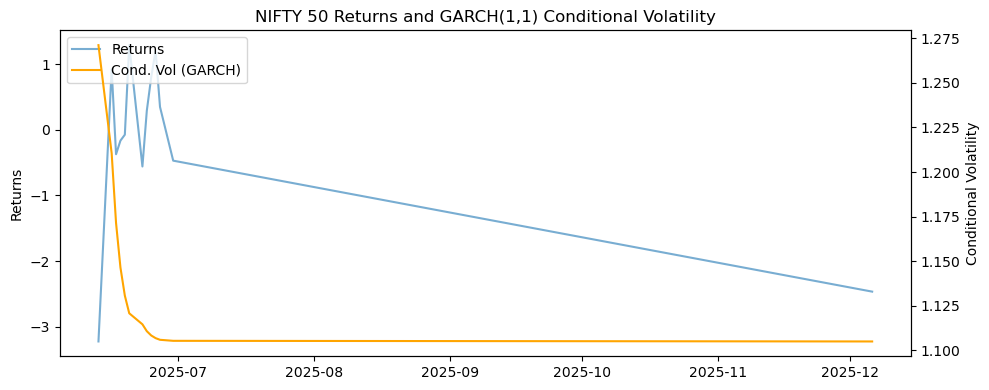

In [52]:
import matplotlib.pyplot as plt

# Plot returns and conditional volatility

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(rets.index, rets_np, label='Returns', alpha=0.6)
ax1.set_ylabel('Returns')

ax2 = ax1.twinx()
ax2.plot(rets.index, cond_vol, color='orange', label='Cond. Vol (GARCH)')
ax2.set_ylabel('Conditional Volatility')

ax1.set_title('NIFTY 50 Returns and GARCH(1,1) Conditional Volatility')

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()
